In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('IMDB_Dataset.csv')

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape

(500, 2)

In [ ]:
df.describe()

,review,sentiment
count,500,500
unique,500,2
top,One of the other reviewers has mentioned that ...,negative
freq,1,263


In [ ]:
df.duplicated().sum()

0

In [ ]:
from wordcloud import WordCloud

In [ ]:
# Combine all reviews into a single string
text = " ".join(review for review in df.review)

In [ ]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200).generate(text)


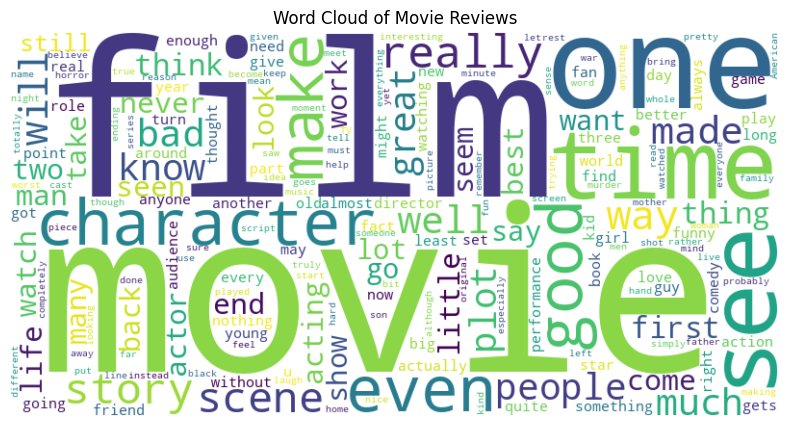

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Reviews')
plt.show()

In [ ]:
reviews = ' '.join(word for word in df['review'][df['sentiment']=="negative"].astype(str))
wordcloud = WordCloud(width=1000, height=600, colormap='viridis', max_font_size=100).generate(reviews)

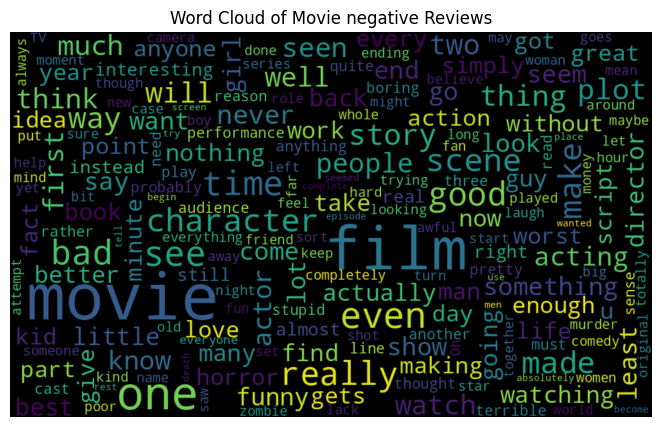

In [ ]:
#Word Cloud of Movie negative Reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie negative Reviews')
plt.show()

In [ ]:
reviews1 = ' '.join(word for word in df['review'][df['sentiment']=="positive"].astype(str))
wordcloud = WordCloud(width=1000, height=500, max_font_size=100).generate(reviews1)

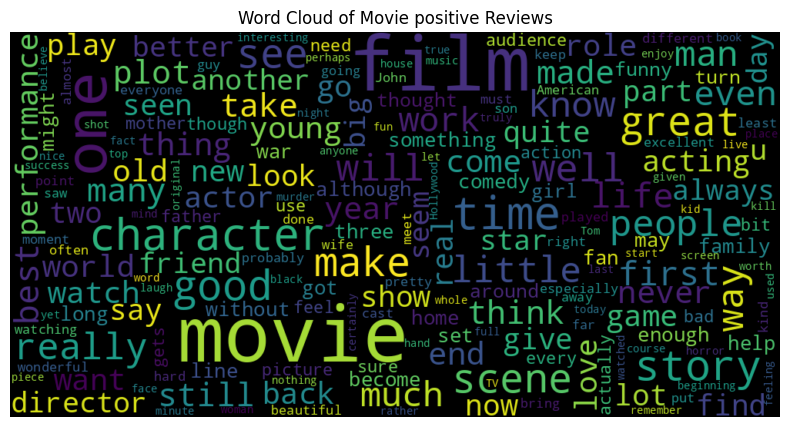

In [ ]:
#Word Cloud of Movie positive Reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie positive Reviews')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [ ]:
reviews = cv.fit_transform(df['review']).toarray()

In [ ]:
df['sentiment'] = df['sentiment'].replace({'positive': 1, 'negative': 0})

In [ ]:
df['sentiment'].value_counts()

sentiment
0    263
1    237
Name: count, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
model = LogisticRegression()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(reviews, df['sentiment'], test_size=0.2, random_state=42)

In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

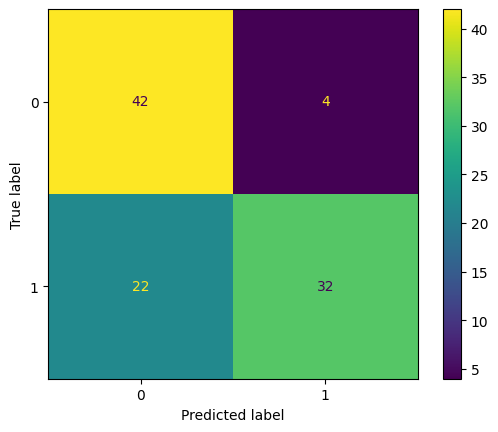

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [ ]:
def predict_sentiment(review, model=model, cv=cv):

  review_transformed = cv.transform([review]).toarray()

  # Make the prediction using the fitted model
  prediction = model.predict(review_transformed)[0]

  # Return the sentiment based on the prediction
  if prediction == 1:
    return "positive"
  else:
    return "negative"

# Get review from user
review_input = input("Enter your movie review: ")
predicted_sentiment = predict_sentiment(review_input)
print(f"The predicted sentiment is: {predicted_sentiment}")

Enter your movie review: worst movie
The predicted sentiment is: negative
